# Business Understanding


An insurance company has approached with a dataset of previous claims of their clients and want to develop a model to help them predict which claims look fraudulent. 

Claim related fraud is a huge problem in the insurance industry. It is quite complex and difficult to identify those unwanted claims. 

The data that I have is from Automobile Insurance. I will be creating a predictive model that predicts if an insurance claim is fraudulent or not. The answer between YES/NO, is a Binary Classification task. A comparison study has been performed to understand which ML algorithm suits best to the dataset

In [ ]:
#importing all necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from google.colab import drive   #mounting in my drive
drive.mount("/content/drive")

Mounted at /content/drive


# Data PreProcessing on Train Data

In [58]:
df=pd.read_csv("/content/drive/MyDrive/finalhackathon/Train_Vehicle.csv")

In [59]:

# So we use pivot table function to reseting the feature format 

df1=df.pivot_table("VehicleAttributeDetails", "CustomerID", "VehicleAttribute", aggfunc="first") .reset_index() .rename_axis(columns=None)
df1  

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,Vehicle26917,Audi,A5,2008
1,Cust10001,Vehicle15893,Audi,A5,2006
2,Cust10002,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...,...
28831,Cust9993,Vehicle13568,Suburu,Impreza,2007
28832,Cust9994,Vehicle19810,Jeep,Wrangler,2003
28833,Cust9996,Vehicle3339,Suburu,Legacy,2004
28834,Cust9997,Vehicle10240,Suburu,Forrestor,2004


In [60]:
# Reading all train data

tn1=pd.read_csv("/content/drive/MyDrive/finalhackathon/Train_Claim.csv")
tn2=pd.read_csv("/content/drive/MyDrive/finalhackathon/Train_Demographics.csv")
tn3=pd.read_csv("/content/drive/MyDrive/finalhackathon/Train_Policy.csv")
tn4=pd.read_csv("/content/drive/MyDrive/finalhackathon/Traindata_with_Target.csv")
tn5=df1

In [61]:
# Merging all files into one as train:
file1=pd.merge(tn1,tn2)
file2=pd.merge(file1,tn3)
file3=pd.merge(file2,tn4)
train=pd.merge(file3,tn5)


In [62]:
# Displaying 1st 5 rows of Training data
train.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,100/300,1000,1632.73,0,not-in-family,N,Vehicle26917,Audi,A5,2008
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,100/300,1000,1255.19,0,not-in-family,N,Vehicle15893,Audi,A5,2006
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,500/1000,617,1373.38,0,wife,N,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,500/1000,722,1337.60,0,own-child,N,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,100/300,500,1353.73,4279863,unmarried,N,Vehicle28633,Toyota,CRV,2010


In [63]:
#we are replacing all missing values as 'nan'

train.replace("?",np.nan,inplace=True)
train.replace("???",np.nan,inplace=True)
train.replace("MISSINGVALUE",np.nan,inplace=True)
train.replace("MISSEDDATA",np.nan,inplace=True)
train.replace(-1,np.nan,inplace=True)
train.replace(-5,np.nan,inplace=True)
train.replace("MISSINGVAL",np.nan,inplace=True)

In [64]:
train.isna().sum()     # checking how many nan values in all features

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [ ]:
train.info()   # we are getting feature names and its datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            23674 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28805 non-null  float64
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              18377 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   287

# Missing Value Imputation

In [65]:
# imputing missing values with mean,median,mode

train['TypeOfCollission'].fillna(train['TypeOfCollission'].mode()[0],inplace=True)
train['AmountOfTotalClaim'].fillna(train['AmountOfTotalClaim'].mode()[0],inplace=True)
train['IncidentTime'].fillna(train['IncidentTime'].median(),inplace=True)
train['Witnesses'].fillna(train['Witnesses'].mode()[0],inplace=True)
train['InsuredGender'].fillna(train['InsuredGender'].mode()[0],inplace=True)
train['Country'].fillna(train['Country'].mode()[0],inplace=True)
train['PolicyAnnualPremium'].fillna(train['PolicyAnnualPremium'].mean(),inplace=True)
train['VehicleMake'].fillna(train['VehicleMake'].mode()[0],inplace=True)
train['PoliceReport'].fillna(train['PoliceReport'].mode()[0],inplace=True)

In [11]:
train.isna().sum() 

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission                  0
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                      0
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                         0
PoliceReport                      0
AmountOfTotalClaim                0
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                     0
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [66]:
# changing datatype to int
train['AmountOfTotalClaim'] = train['AmountOfTotalClaim'].astype('int')
train['Witnesses'] = train['Witnesses'].astype('int')

# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


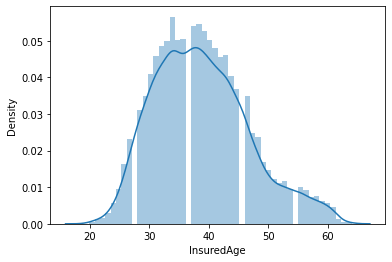

In [ ]:
sns.distplot(train['InsuredAge'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


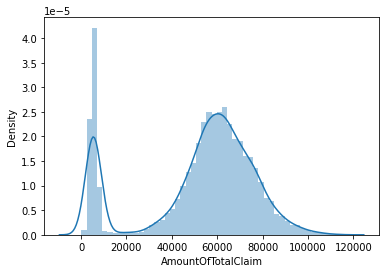

In [ ]:
sns.distplot(train['AmountOfTotalClaim'])

In [14]:
train['DateOfIncident']=pd.to_datetime(train['DateOfIncident'])  # Changing to datetime type

In [15]:
# adding new column by extracting year only

train['DateYear']=train['DateOfIncident'].dt.year  
train['DateYear']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
28831    2015
28832    2015
28833    2015
28834    2015
28835    2015
Name: DateYear, Length: 28836, dtype: int64

In [16]:
train['DateMonth']=train['DateOfIncident'].dt.month  # Extracting by Month
train['DateDay']=train['DateOfIncident'].dt.day    # Extracting by Day



In [17]:
# Changing datatype to int 

train['DateMonth'] = train['DateMonth'].astype('int')
train['DateYear'] = train['DateYear'].astype('int')
train['DateDay'] = train['DateDay'].astype('int')


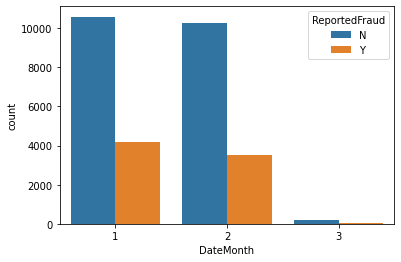

In [ ]:
sns.countplot(x='DateMonth',hue='ReportedFraud',data=train)

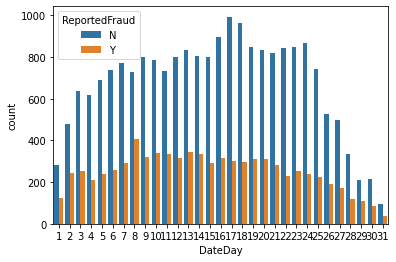

In [ ]:
sns.countplot(x='DateDay',hue='ReportedFraud',data=train)

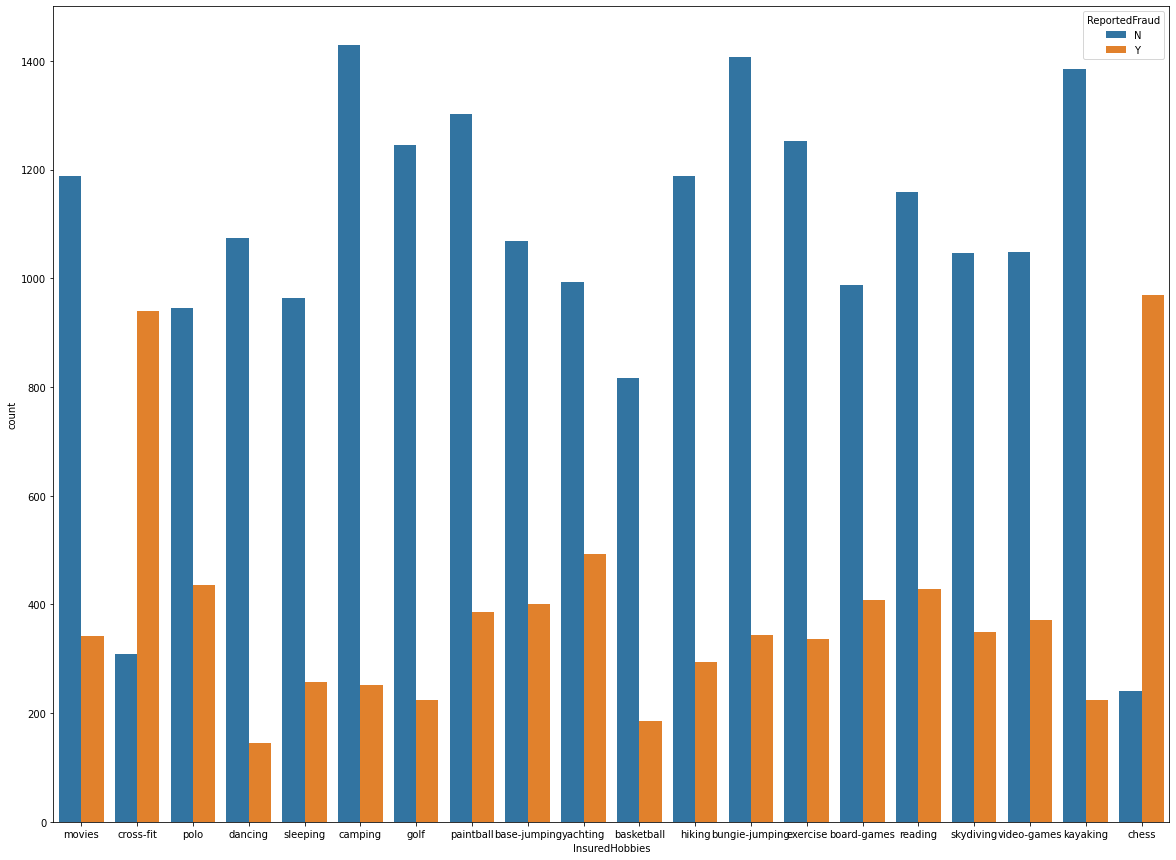

In [ ]:
f, ax = plt.subplots(figsize=(20,15))
sns.countplot(x='InsuredHobbies',hue='ReportedFraud',data=train)

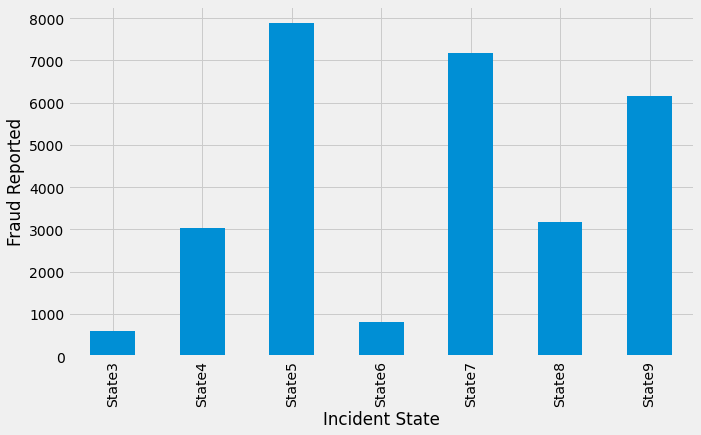

In [91]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = train.groupby('IncidentState').ReportedFraud.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident State')
plt.show()

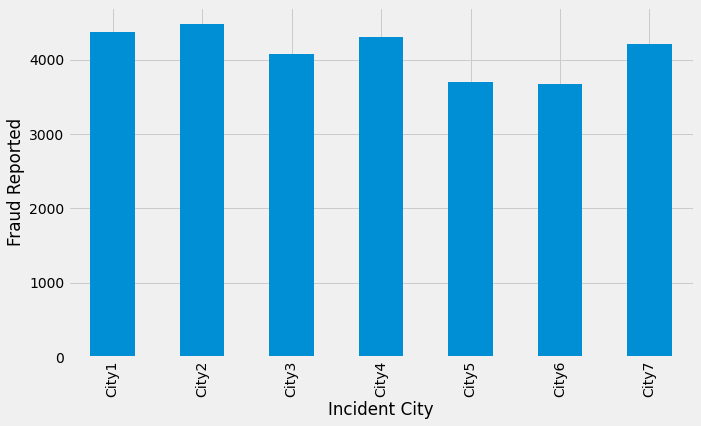

In [92]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = train.groupby('IncidentCity').ReportedFraud.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident City')
plt.show()

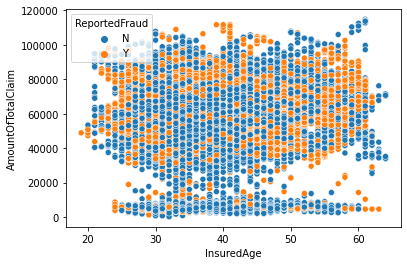

In [ ]:
sns.scatterplot(y='AmountOfTotalClaim',x='InsuredAge',hue='ReportedFraud',data=train)

In [ ]:
# Creating bins for Visualization

train['AgeGroup']=pd.cut(train.InsuredAge,bins=[18,30,45,60],labels=['younger','middle','old'])
train['ClaimRange']=pd.cut(train.AmountOfTotalClaim,bins=[3000,20000,50000,80000,150000],labels=['low','middle','above_mid','high'])


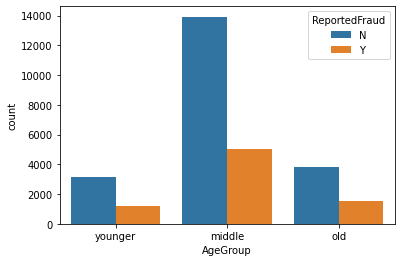

In [ ]:
sns.countplot(x='AgeGroup', hue='ReportedFraud',data=train)


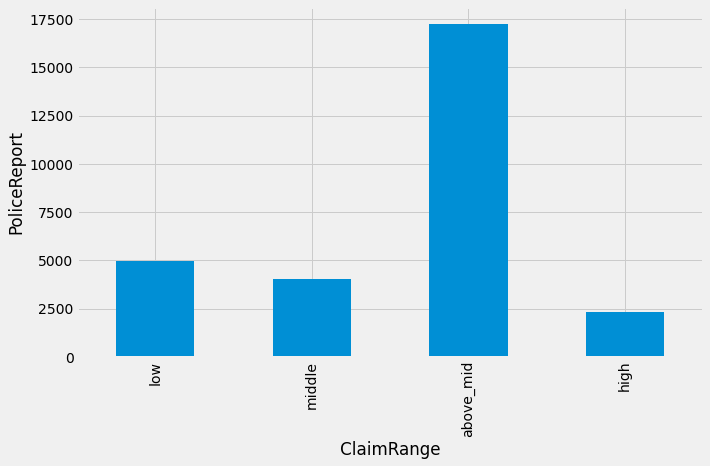

In [93]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = train.groupby('ClaimRange').PoliceReport.count().plot.bar(ylim=0)
ax.set_ylabel('PoliceReport')
ax.set_xlabel('ClaimRange')
plt.show()                         #above mid- 50k to 80k


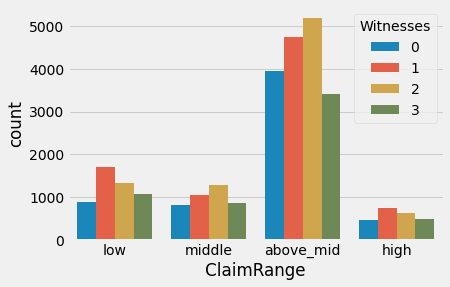

In [89]:
sns.countplot(x='ClaimRange', hue='Witnesses',data=train)


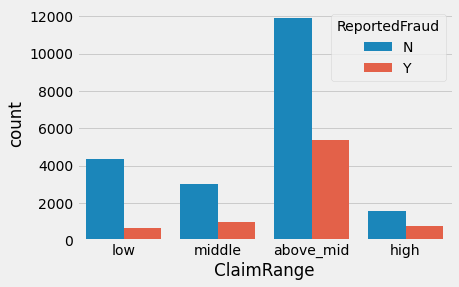

In [90]:
sns.countplot(x='ClaimRange', hue='ReportedFraud',data=train)


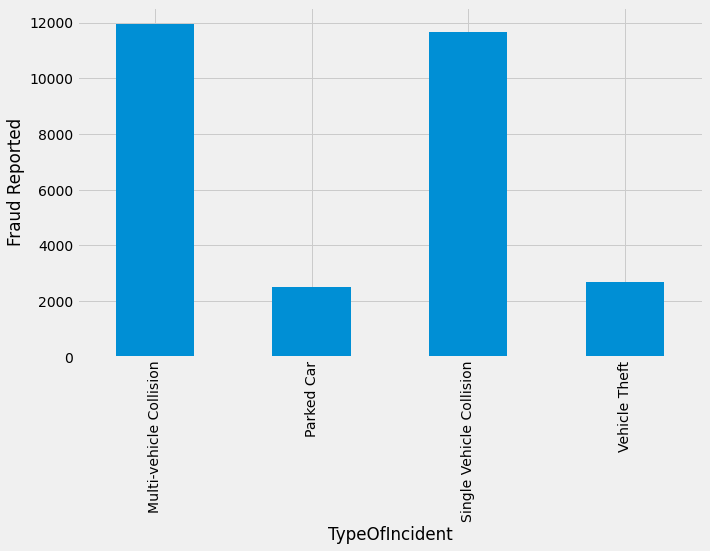

In [86]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = train.groupby('TypeOfIncident').ReportedFraud.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('TypeOfIncident')
plt.show()

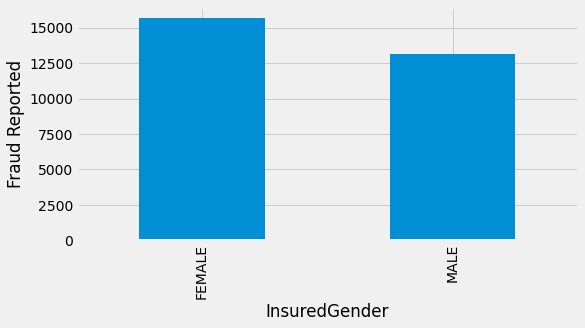

In [97]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,4))
ax = train.groupby('InsuredGender').ReportedFraud.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('InsuredGender')
plt.show()

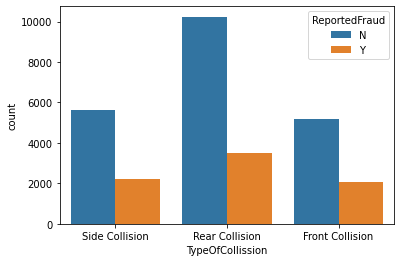

In [69]:
sns.countplot(x='TypeOfCollission', hue='ReportedFraud',data=train)


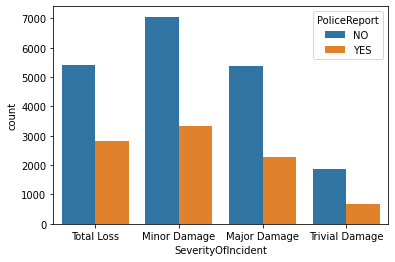

In [74]:
sns.countplot(x='SeverityOfIncident', hue='PoliceReport',data=train)


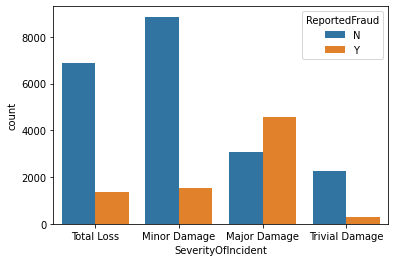

In [75]:
sns.countplot(x='SeverityOfIncident', hue='ReportedFraud',data=train)

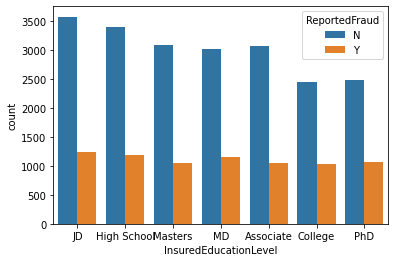

In [ ]:
sns.countplot(x='InsuredEducationLevel', hue='ReportedFraud',data=train)


In [19]:
# dropping unneccesary columns

train=train.drop(columns=['PropertyDamage','CustomerID','InsuredRelationship','IncidentAddress','InsuredZipCode','DateOfIncident','DateYear','AgeGroup','ClaimRange'])

# Visualization by HeatMap

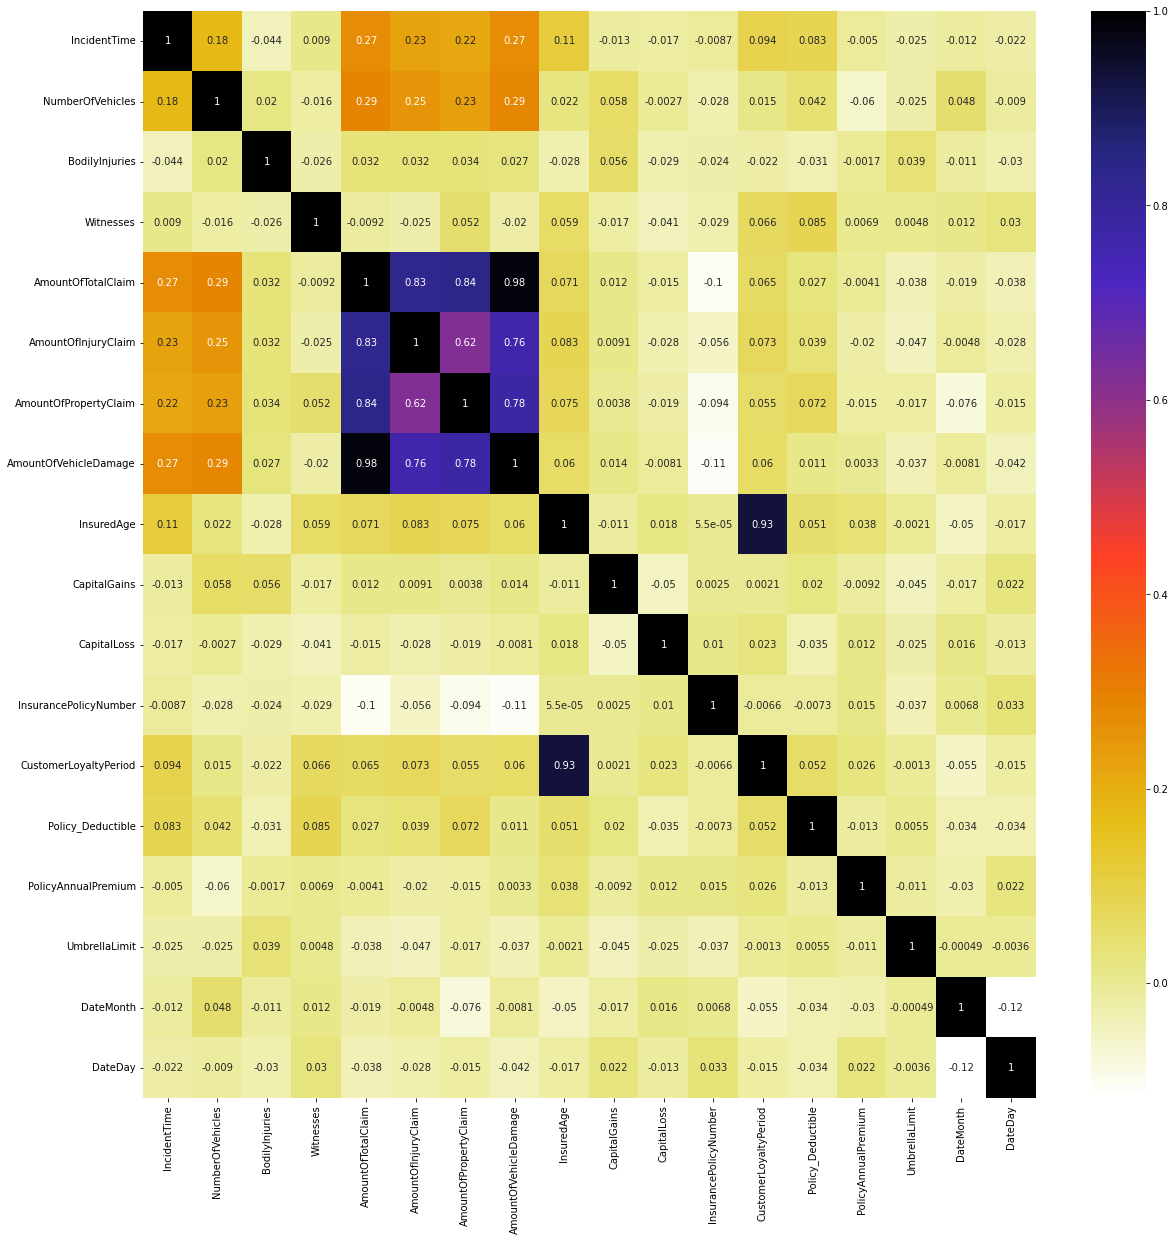

In [20]:
# checking correlation between the features

plt.figure(figsize=(20,20))
cor=train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [21]:
#converting all categorical features into numerical

cat_col=['TypeOfIncident','TypeOfCollission','SeverityOfIncident','AuthoritiesContacted',
                         
          'PoliceReport','InsuredGender','InsuredEducationLevel','InsuredOccupation','DateOfPolicyCoverage',
          'InsurancePolicyState','Policy_CombinedSingleLimit',        
          'ReportedFraud','VehicleID','VehicleMake','VehicleModel','VehicleYOM','IncidentCity','IncidentState','Country','InsuredHobbies']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
    train[col]= le.fit_transform(train[col])  

In [22]:
x_train=train.drop('ReportedFraud',axis=1)   # Dropping Target Column
y_train=train['ReportedFraud']        #Target Column 
x_train.shape

(28836, 37)

# Feature Selection

In [23]:
# creating Function for checking correlated variables

def correlation(x_train,threshold):
  col_corr=set()
  corr_matrix=x_train.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j] )>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname) 
  return col_corr 

In [24]:
# Fixing thrshold value percentage as 0.9:

corr_features=correlation(x_train,0.9)
len(set(corr_features))
print('correlated features:',len(set(corr_features)))

correlated features: 2


In [25]:
print('correlated features are:' , corr_features)   # finding Correlated features

correlated features are: {'AmountOfVehicleDamage', 'CustomerLoyaltyPeriod'}


In [26]:
x_train_noncorr=x_train.drop(corr_features,axis=1)  # Dropping Correlated features in train data


# Feature Scaling

In [27]:
# Feature Scaling---Min-Max

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x_train=pd.DataFrame(min_max.fit_transform(x_train_noncorr))

# Data PreProcessing on Test Data

In [28]:
df2=pd.read_csv("/content/drive/MyDrive/TestData/Test_Vehicle.csv")

In [29]:
df3=df2.pivot_table("VehicleAttributeDetails", "CustomerID", "VehicleAttribute", aggfunc="first") .reset_index() .rename_axis(columns=None) 
df3

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,Vehicle37114,Accura,TL,2009
4,Cust1003,Vehicle16771,Dodge,RAM,2007
...,...,...,...,...,...
8907,Cust9984,Vehicle19062,Saab,95,2000
8908,Cust9986,Vehicle18191,Saab,92x,2000
8909,Cust9990,Vehicle11032,BMW,Civic,1998
8910,Cust9995,Vehicle30412,Jeep,Grand Cherokee,2002


In [30]:
n1=pd.read_csv("/content/drive/MyDrive/TestData/Test_Claim.csv")
n2=pd.read_csv("/content/drive/MyDrive/TestData/Test_Demographics.csv")
n3=pd.read_csv("/content/drive/MyDrive/TestData/Test_Policy.csv")
n4=pd.read_csv("/content/drive/MyDrive/TestData/Test.csv")
n5=df3

In [31]:
fil1=pd.merge(n1,n2)
fil2=pd.merge(fil1,n3)
fil3=pd.merge(fil2,n4)
test=pd.merge(fil3,n5)

In [32]:

test.replace("?",np.nan,inplace=True)
test.replace("???",np.nan,inplace=True)
test.replace("MISSINGVALUE",np.nan,inplace=True)
test.replace("MISSEDDATA",np.nan,inplace=True)
test.replace(-1,np.nan,inplace=True)
test.replace(-5,np.nan,inplace=True)
test.replace("MISSINGVAL",np.nan,inplace=True)

In [33]:
test['TypeOfCollission'].fillna(test['TypeOfCollission'].mode()[0],inplace=True)
test['AmountOfTotalClaim'].fillna(test['AmountOfTotalClaim'].mode()[0],inplace=True)
test['IncidentTime'].fillna(test['IncidentTime'].median(),inplace=True)
test['Witnesses'].fillna(test['Witnesses'].mode()[0],inplace=True)
test['InsuredGender'].fillna(test['InsuredGender'].mode()[0],inplace=True)
test['Country'].fillna(test['Country'].mode()[0],inplace=True)
test['PolicyAnnualPremium'].fillna(test['PolicyAnnualPremium'].mean(),inplace=True)
test['VehicleMake'].fillna(test['VehicleMake'].mode()[0],inplace=True)
test['PoliceReport'].fillna(test['PoliceReport'].mode()[0],inplace=True)


In [34]:
test['DateOfIncident']=pd.to_datetime(test['DateOfIncident'])

In [35]:
test['DateDay']=test['DateOfIncident'].dt.day
test['DateMonth']=test['DateOfIncident'].dt.month
test['DateYear']=test['DateOfIncident'].dt.year



In [36]:
test['DateMonth'] = test['DateMonth'].astype('int')
test['DateYear'] = test['DateYear'].astype('int')
test['DateDay'] = test['DateDay'].astype('int')


In [37]:
test['AmountOfTotalClaim'] = test['AmountOfTotalClaim'].astype('int')
test['Witnesses'] = test['Witnesses'].astype('int')


In [39]:
test=test.drop(columns=['PropertyDamage','InsuredRelationship','DateOfIncident','IncidentAddress','InsuredZipCode','DateOfIncident','DateYear'])

In [40]:
cat_col1=['TypeOfIncident','TypeOfCollission','SeverityOfIncident','AuthoritiesContacted',
                         
          'PoliceReport','InsuredGender','InsuredEducationLevel','InsuredOccupation','DateOfPolicyCoverage',
          'InsurancePolicyState','Policy_CombinedSingleLimit',        
          'VehicleID','VehicleMake','VehicleModel','VehicleYOM','IncidentCity','IncidentState','Country','InsuredHobbies']
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()

for col1 in cat_col1:
    test[col1]= le1.fit_transform(test[col1]) 

In [41]:
test_noncorr=test.drop(corr_features,axis=1)   # Dropping Correlated Columns in test data also

In [42]:
custid=test_noncorr['CustomerID']  # save the feature in "custid" variable

In [43]:
test_noncorr.drop(['CustomerID'],axis=1,inplace=True)  # Dropping CustomerID column in test data

In [44]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
test=pd.DataFrame(min_max.fit_transform(test_noncorr))

In [46]:
print(x_train.shape)
print(test.shape)

(28836, 35)
(8912, 35)


# Defining Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)

# HyperParameter Tuning

In [ ]:
# Defining parameter for hyperParameter Tuning

from sklearn.model_selection import GridSearchCV  # importing GridSearchCV for Tuning

n_estimators=[100]

min_samples_split=[2,4,6]

min_samples_leaf=[1,2,4,6]

param_grid={'n_estimators': n_estimators,
            'min_samples_split':min_samples_split,
             'min_samples_split': min_samples_split,
             'criterion':['gini']}
print(param_grid)

{'n_estimators': [100], 'min_samples_split': [2, 4, 6], 'criterion': ['gini']}


In [ ]:
#importing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_gridcv=GridSearchCV(estimator=rf,param_grid=param_grid,cv=kf,verbose=2)  

rf_gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   6.2s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   6.2s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   6.4s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   6.3s
[CV] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   6.1s
[CV] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   6.2s
[CV] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   5.6s
[CV] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   7.5s
[CV] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   6.2s
[CV] END criterion=gini, min_samples_split=6, n_estimators=100; total time=   6.0s
[CV] END criterion=gini, mi

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [100]},
             verbose=2)

In [ ]:
rf_gridcv.best_params_   # finding best Parameters

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
rf_gridcv.best_estimator_


RandomForestClassifier()

In [ ]:
best_grid=rf_gridcv.best_estimator_

In [ ]:
# Predicting the values on Test data

y_pred=best_grid.predict(test)

In [ ]:
# Counting no.of 0 and 1

count=np.bincount(y_pred)
print(count[0])
print(count[1])

7531
1381


In [ ]:
result1=pd.DataFrame({'CustomerID':custid,'ReportedFraud':y_pred})

In [ ]:
result1.to_csv('Final_prediction.csv')

# Imputed to find Best Model

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [53]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [54]:
models=[]
models.append(('XGB',XGBClassifier(learning_rate=0.01,gamma=0.1,max_depth=3,min_child_weight=3)))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LogisticRegression',LogisticRegression()))
models.append(('Rf',RandomForestClassifier()))

results=[]
names=[]


for name,model in models:
  model.fit(x_train,y_train)

  y_pred=model.predict(x_test)
  predictions=[round(value) for value in y_pred]

  accuracy=accuracy_score(y_test,predictions)
  print('Accuracy: %2f%%' %(accuracy*100),name)
  

Accuracy: 87.668193% XGB
Accuracy: 92.550978% KNN
Accuracy: 82.521848% LogisticRegression
Accuracy: 93.341656% Rf


# Conclusion

With Random Forest Machine Learning Algorithm, I tried to built a Machine Learning Model and helped the Insurance industry with this problem.With the given Train and Test data,my Model is predicted whether the claim of the Person is Fraudulent or not with the F1 Score of 82%. 

Insights from Visualization:
1.Mostly People in the Age between 30-45 were invloved in Fraudulent Claim
2.Mostly People who were claiming above mid range(50k to 80k) has invloved Fraudulent claim.


Like this we can filter out based on Visualization ,so we can concentrate on the specific areas where the Fraudulent ocuuring Mostly and avoid these kind of fraudulent.

By doing this prediction,i hope to save the company millions of dollars annually.
